# Linear Algebra Refresher

In [13]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import slideUtilities as sl
import laUtilities as ut
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [14]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

Today we'll review the essentials of linear algebra.  Given the prerequisites for this course, I assume that you learned all of this once.  What I want to do today is bring the material back into your mind fresh.

## Vectors and Matrices

A __matrix__ is a rectangular array of numbers, for example:

$$X = \left[\begin{array}{rrr}
    1  & -2  & 1 \\
    0 & 2 &  - 8 \\
    6 & 5 &9 
\end{array}
\right]$$


A matrix with only one column is called a __column vector__, or simply a __vector__.

Here are some examples.

These are vectors in $\mathbb{R}^2$:
$$
\begin{array}{ccc}
{\bf u} = \mat{{r}3\\-1} &
{\bf v} = \mat{{c}.2\\.3} &
{\bf w} = \mat{{c}w_1\\w_2}
\end{array}
$$


and these are vectors in $\mathbb{R}^3$:

$$
\begin{array}{ccc}
{\bf u} = \left[\begin{array}{c}2\\3\\4\end{array}\right] &
{\bf v} = \left[\begin{array}{r}-1\\0\\2\end{array}\right] &
{\bf w} = \left[\begin{array}{c}w_1\\w_2\\w_3\end{array}\right]
\end{array}
$$

We will use uppercase letters ($X$) for matrices and lowercase __bold__ leters for vectors ($\vu$).

A vector like $\left[\begin{array}{c}-2\\-1\end{array}\right]$ (also denoted $(-2,-1)$) can be thought of as a point on the plane.

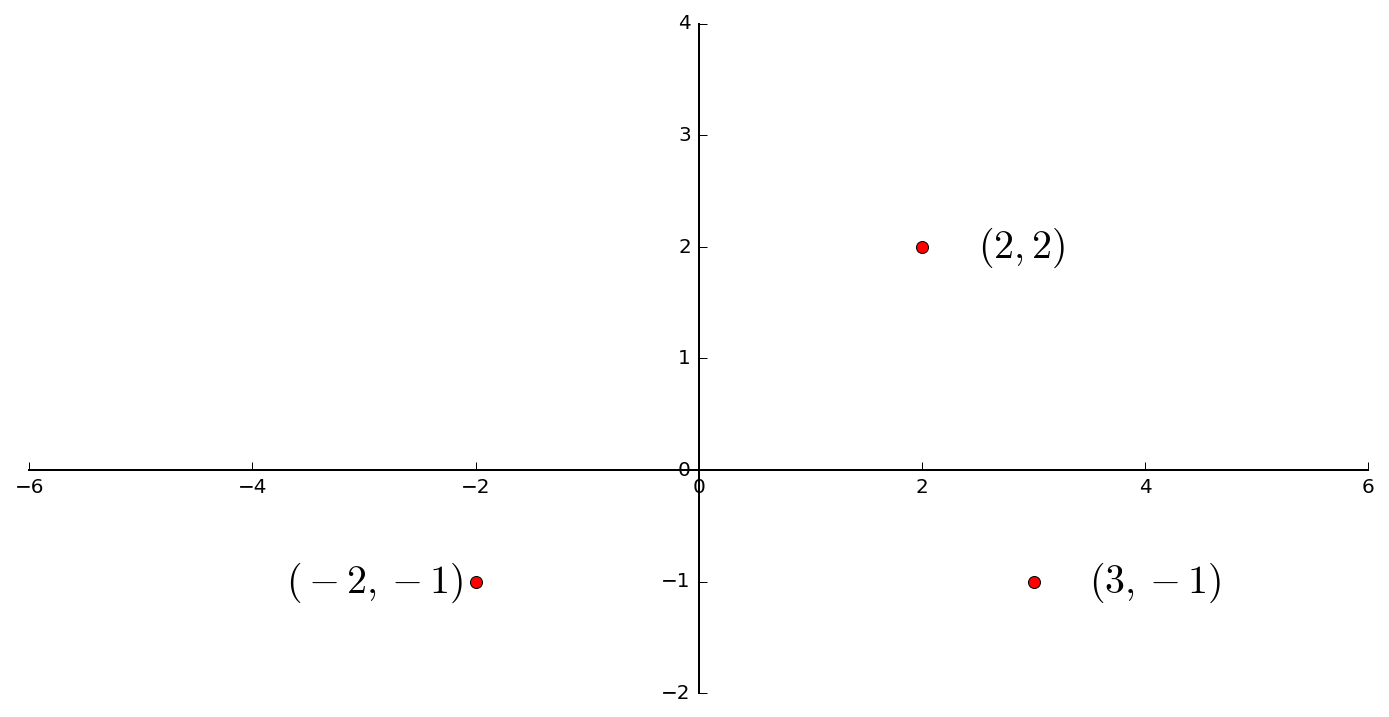

In [16]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(size=(12,6))
ut.centerAxes(ax)
ut.plotPoint(ax, -2, -1)
ut.plotPoint(ax, 2, 2)
ut.plotPoint(ax, 3, -1)
ax.plot(0, -2, '')
ax.plot(-4, 0, '')
ax.text(3.5, -1.1, '$(3,-1)$', size=20)
ax.text(2.5, 1.9, '$(2,2)$', size=20)
ax.text(-3.7, -1.1, '$(-2,-1)$', size=20)
print('')

Sometimes we draw an arrow from the origin to the point.  This comes from physics, but can be a helpful visualization in any case.

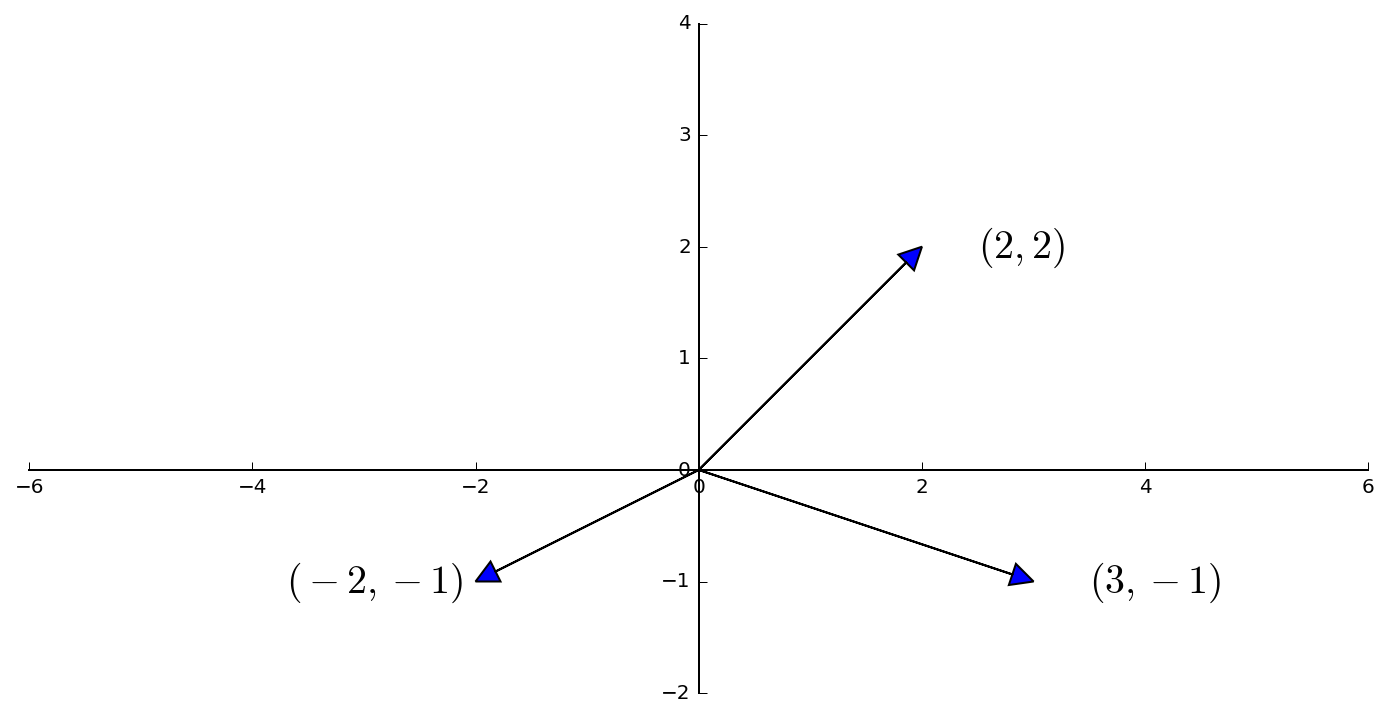

In [19]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(size=(12,6))
ut.centerAxes(ax)
ax.arrow(0, 0, -2, -1, head_width=0.2, head_length=0.2, length_includes_head = True)
ax.arrow(0, 0, 2, 2, head_width=0.2, head_length=0.2, length_includes_head = True)
ax.arrow(0, 0, 3, -1, head_width=0.2, head_length=0.2, length_includes_head = True)
ax.plot(0, -2, '')
ax.plot(-4, 0, '')
ax.plot(0, 2, '')
ax.plot(4 ,0, '')
ax.text(3.5, -1.1, '$(3,-1)$', size=20)
ax.text(2.5, 1.9, '$(2,2)$', size=20)
ax.text(-3.7, -1.1, '$(-2,-1)$', size=20)
print('')

## Vector Addition, Geometrically

A geometric interpretation of vector sum is as a parallelogram.  If ${\bf u}$ and ${\bf v}$ in $\mathbb{R}^2$ are represented as points in the plane, then ${\bf u} + {\bf v}$ corresponds to the fourth vertex of the parallelogram whose other vertices are ${\bf u}, 0,$ and ${\bf v}$.

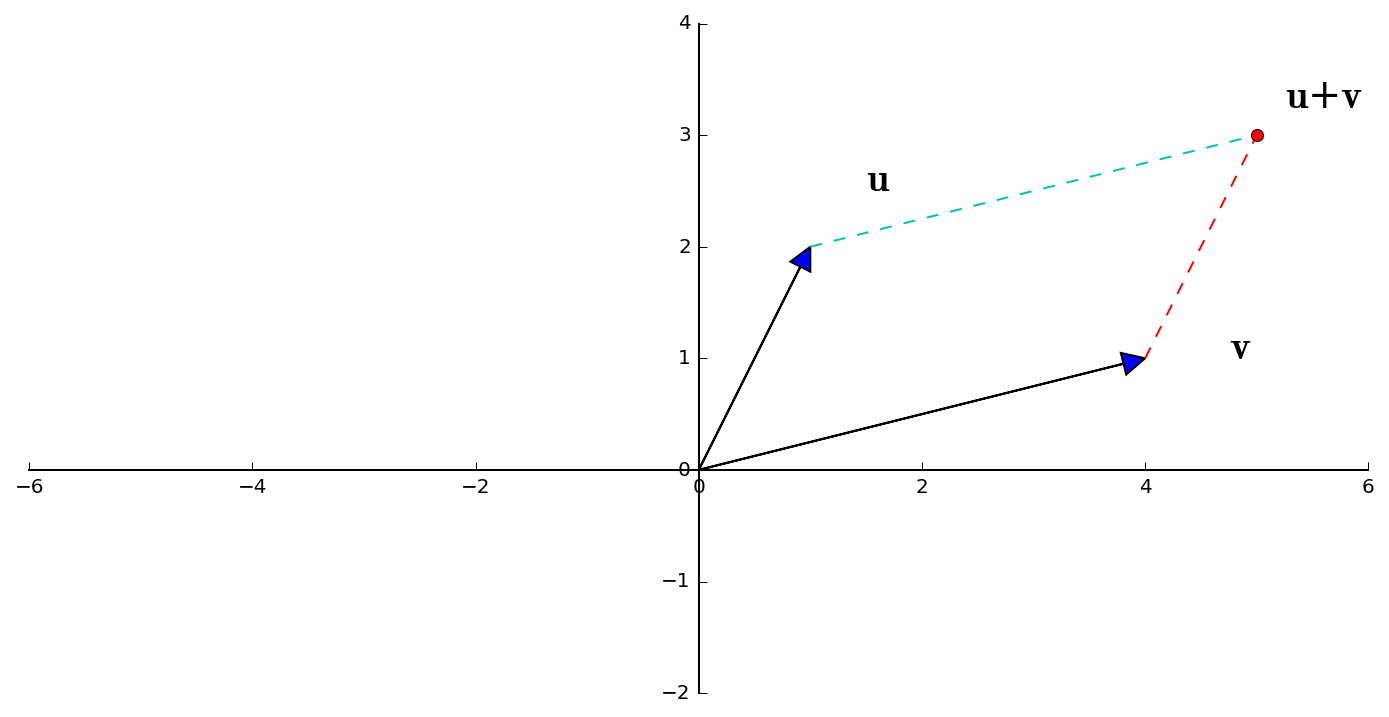

In [21]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(size=(12,6))
ut.centerAxes(ax)
ax.arrow(0, 0, 1, 2, head_width=0.2, head_length=0.2, length_includes_head = True)
ax.arrow(0, 0, 4, 1, head_width=0.2, head_length=0.2, length_includes_head = True)
ax.plot([4,5],[1,3],'--')
ax.plot([1,5],[2,3],'--')
ax.text(5.25,3.25,r'${\bf u}$+${\bf v}$',size=20)
ax.text(1.5,2.5,r'${\bf u}$',size=20)
ax.text(4.75,1,r'${\bf v}$',size=20)
ut.plotPoint(ax,5,3)
ax.plot(0,0,'')
print('')

Optimization.  Linear algebra -- L2 norm, vectors, least squares, minimizing the L2 norm.

Need to review matrix decomposition - eigendecomposition (prep for SVD)

Markov Chains?


Most important: length and distance 